# Task 6.6 

For this task I have decided to work with another data set, GDP from 1999 to 2022. As previously established, GDP is one of the variables that influences the happiness score the most. For this task I am going to do a time series analysis for the country's GDP with the most consistent top happiness score.

## 1. Importing libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

In [2]:
#Disable deprecation warnings that could indicate, for instance, a suspended library or
#feature. These are more relevant to developers and very seldom to analysts.
warnings.filterwarnings("ignore")

In [3]:
#This is a styling option for how your plots will appear. 
plt.style.use('fivethirtyeight') 

In [4]:
#Importing data
df_all = pd.read_pickle(r'/Users/marianino/Desktop/Happiness Data/Data/Cleaned Data/df_all.pkl')

In [5]:
#Check data 
df_all.head()

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Country,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [6]:
#Choosing the top country
top_10_rank = df_all.nlargest(10, 'Happiness Score')

In [7]:
top_10_rank

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Country,,,,,,,,,,
Finland,Western Europe,1,7.769,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,2019
Finland,Western Europe,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,2018
Denmark,Western Europe,2,7.600,1.383000,1.573000,0.996000,0.592000,0.410000,0.252000,2019
Norway,Western Europe,2,7.594,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,2018
Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
Denmark,Western Europe,3,7.555,1.351000,1.590000,0.868000,0.683000,0.408000,0.284000,2018
Norway,Western Europe,3,7.554,1.488000,1.582000,1.028000,0.603000,0.341000,0.271000,2019
Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017


#Finland has had the highest happiness score for 2 years in a row, so I will choose this country. 

In [8]:
#Importing gdp data set 
df_gdp = pd.read_csv(r'/Users/marianino/Desktop/Happiness Data/Data/Original Data/GDP by Country 1999-2022.csv')

In [9]:
#Check data
df_gdp.head()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534


## 2. Subsetting, wrangling, and cleaning time-series data

I only need Finlands gdp through the years so I will get the data for that. 

In [10]:
df_finland = df_gdp[df_gdp['Country'] == 'Finland']

In [11]:
df_finland

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
56,Finland,130.948,122.222,125.269,135.972,165.031,189.411,195.785,210.837,225.434,...,281.948,293.345,230.685,237.111,246.361,256.596,267.335,281.26,296.016,314.538


In [12]:
#Dropping the country column because we know it's only Finlands GDP
df_finland = df_finland.drop('Country', axis=1)

In [13]:
df_finland

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
56,130.948,122.222,125.269,135.972,165.031,189.411,195.785,210.837,225.434,235.106,...,281.948,293.345,230.685,237.111,246.361,256.596,267.335,281.26,296.016,314.538


In [14]:
#Changing the years into columns
df_finland = pd.melt(df_finland.reset_index(), id_vars=['index'], var_name='Year', value_name='GDP')

In [15]:
df_finland

,index,Year,GDP
0,56,1999,130.948
1,56,2000,122.222
2,56,2001,125.269
3,56,2002,135.972
4,56,2003,165.031
5,56,2004,189.411
6,56,2005,195.785
7,56,2006,210.837
8,56,2007,225.434
9,56,2008,235.106


In [16]:
df_finland = df_finland.drop('index', axis=1)

In [17]:
df_finland

,Year,GDP
0,1999,130.948
1,2000,122.222
2,2001,125.269
3,2002,135.972
4,2003,165.031
5,2004,189.411
6,2005,195.785
7,2006,210.837
8,2007,225.434
9,2008,235.106


In [18]:
#Check data types
df_finland.dtypes

Year    object
GDP     object
dtype: object

In [19]:
#Changing data types
df_finland['Year'] = df_finland['Year'].astype('datetime64[ns]')

In [20]:
df_finland['GDP'] = df_finland['GDP'].astype('float64')

In [21]:
df_finland.dtypes

Year    datetime64[ns]
GDP            float64
dtype: object

In [22]:
#Set the year as the index
df_finland = df_finland.set_index('Year')

In [23]:
df_finland.head()

,GDP
Year,
1999-01-01,130.948
2000-01-01,122.222
2001-01-01,125.269
2002-01-01,135.972
2003-01-01,165.031


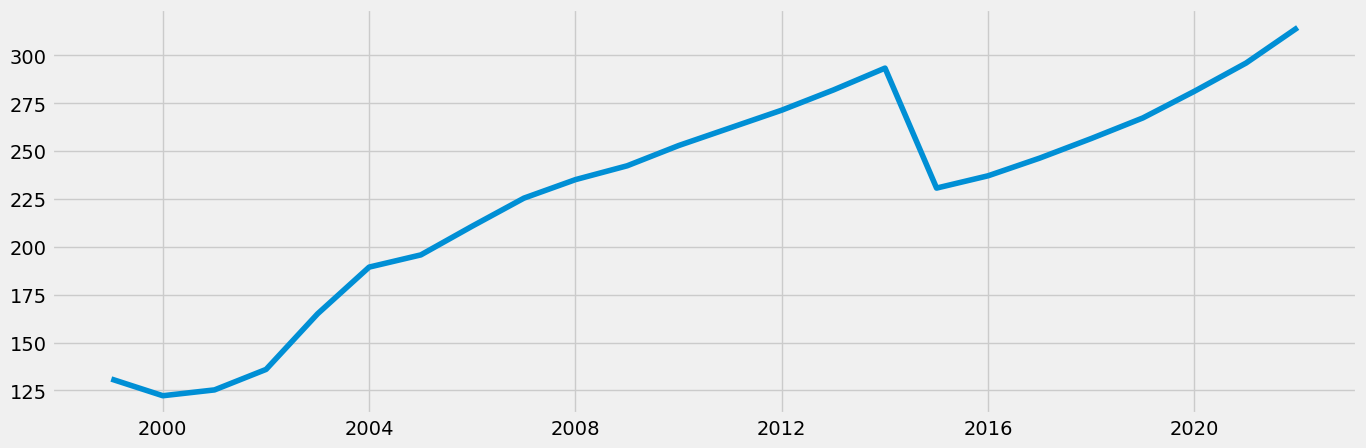

In [24]:
#Plot data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_finland)

### Missing value

After checking the data set I found that the gdp for the year 2011 was missing so I added it. The GDP I use is from the world bank. Which is where all the other years come from. 

In [25]:
df_finland.index = pd.to_datetime(df_finland.index)

In [26]:
df_finland

,GDP
Year,
1999-01-01,130.948
2000-01-01,122.222
2001-01-01,125.269
2002-01-01,135.972
2003-01-01,165.031
2004-01-01,189.411
2005-01-01,195.785
2006-01-01,210.837
2007-01-01,225.434


In [27]:
df_finland.shape 

(23, 1)

In [28]:
# Check if the year 2011 is missing
if '2011-01-01' not in df_finland.index:
    
    # Add a missing row with value from the WB as the GDP value
    df_finland.loc['2011-01-01'] = pd.Series({'GDP': float('275.600')})

In [29]:
print(df_finland)

                         GDP
Year                        
1999-01-01 00:00:00  130.948
2000-01-01 00:00:00  122.222
2001-01-01 00:00:00  125.269
2002-01-01 00:00:00  135.972
2003-01-01 00:00:00  165.031
2004-01-01 00:00:00  189.411
2005-01-01 00:00:00  195.785
2006-01-01 00:00:00  210.837
2007-01-01 00:00:00  225.434
2008-01-01 00:00:00  235.106
2009-01-01 00:00:00  242.328
2010-01-01 00:00:00  252.911
2012-01-01 00:00:00  271.393
2013-01-01 00:00:00  281.948
2014-01-01 00:00:00  293.345
2015-01-01 00:00:00  230.685
2016-01-01 00:00:00  237.111
2017-01-01 00:00:00  246.361
2018-01-01 00:00:00  256.596
2019-01-01 00:00:00  267.335
2020-01-01 00:00:00  281.260
2021-01-01 00:00:00  296.016
2022-01-01 00:00:00  314.538
2011-01-01           275.600


In [30]:
# Convert the index to datetime if it's not already
df_finland.index = pd.to_datetime(df_finland.index)

In [31]:
# Sort the index to ensure it's in chronological order
df_finland = df_finland.sort_index()

In [32]:
print(df_finland)

                GDP
Year               
1999-01-01  130.948
2000-01-01  122.222
2001-01-01  125.269
2002-01-01  135.972
2003-01-01  165.031
2004-01-01  189.411
2005-01-01  195.785
2006-01-01  210.837
2007-01-01  225.434
2008-01-01  235.106
2009-01-01  242.328
2010-01-01  252.911
2011-01-01  275.600
2012-01-01  271.393
2013-01-01  281.948
2014-01-01  293.345
2015-01-01  230.685
2016-01-01  237.111
2017-01-01  246.361
2018-01-01  256.596
2019-01-01  267.335
2020-01-01  281.260
2021-01-01  296.016
2022-01-01  314.538


## 3. Decompose data components

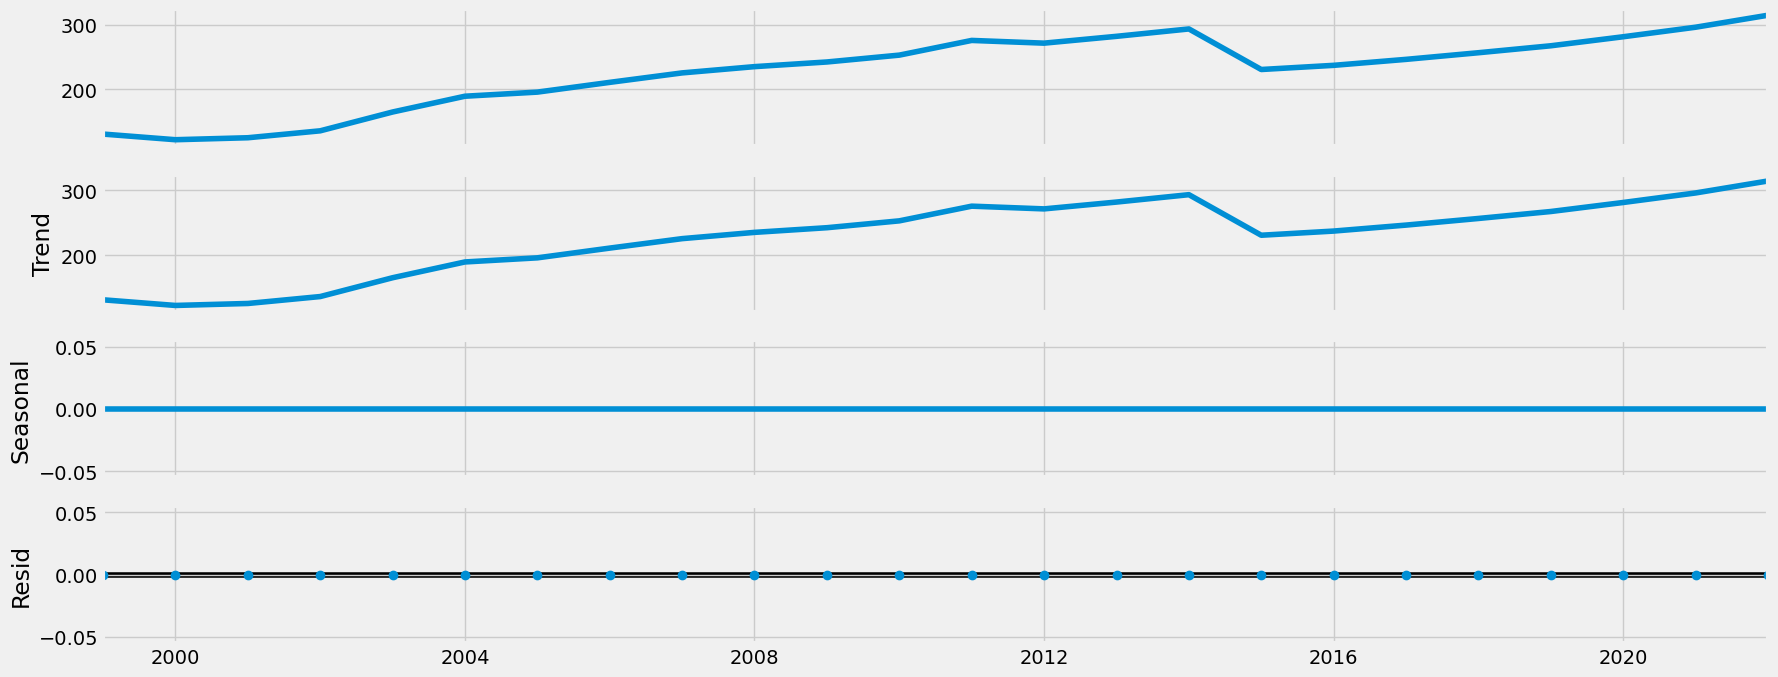

In [33]:
#Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_finland, model='additive') 

# This will define a fixed size for all special charts.
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

# Plot the separate components
decomposition.plot()
plt.show()

observations: 
From the graph we can observe that the gdp normally increases over the years, with a drop around 2015. 

## 4. Testing for stationarity

In [34]:
#The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
#an array of numbers.This is why you need to also define a function that prints the correct output from that array.

# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used']) 
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
        print (result)
                                         
# Apply the test using the function on the time series
dickey_fuller(df_finland['GDP'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.972223
p-value                         0.763260
Number of Lags Used             0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
dtype: float64
Test Statistic                 -0.972223
p-value                         0.763260
Number of Lags Used             0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
dtype: float64
Test Statistic                 -0.972223
p-value                         0.763260
Number of Lags Used             0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


Observation:

Overall, based on these results, it appears that the time series data is non-stationary, as indicated by the non-significant p-value and the test statistic not exceeding the critical values. 

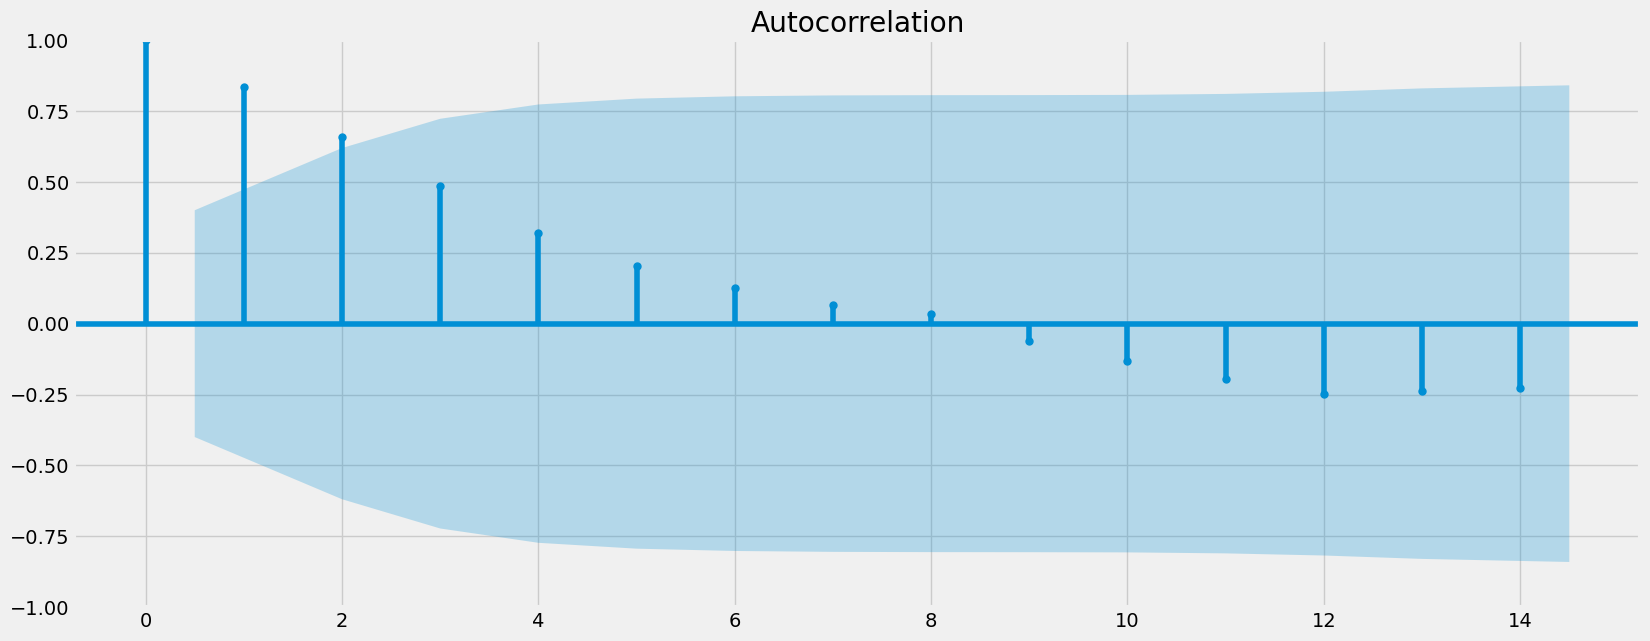

In [35]:
#Check out a plot of autocorrelations
#Here, you import the autocorrelation and partial correlation plots.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_finland)
plt.show()

Observation: There aren't many lags going above the confidence interval. Which contradicts the Dickey-Fuller test. 

## 5. Stationarizing the data

In [36]:
#The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

finland_diff = df_finland - df_finland.shift(1) 

In [37]:
#Here, you remove the missing values that came about as a result of the differencing.

finland_diff.dropna(inplace = True)

In [38]:
finland_diff.head()

,GDP
Year,
2000-01-01,-8.726
2001-01-01,3.047
2002-01-01,10.703
2003-01-01,29.059
2004-01-01,24.380


In [39]:
finland_diff.columns

Index(['GDP'], dtype='object')

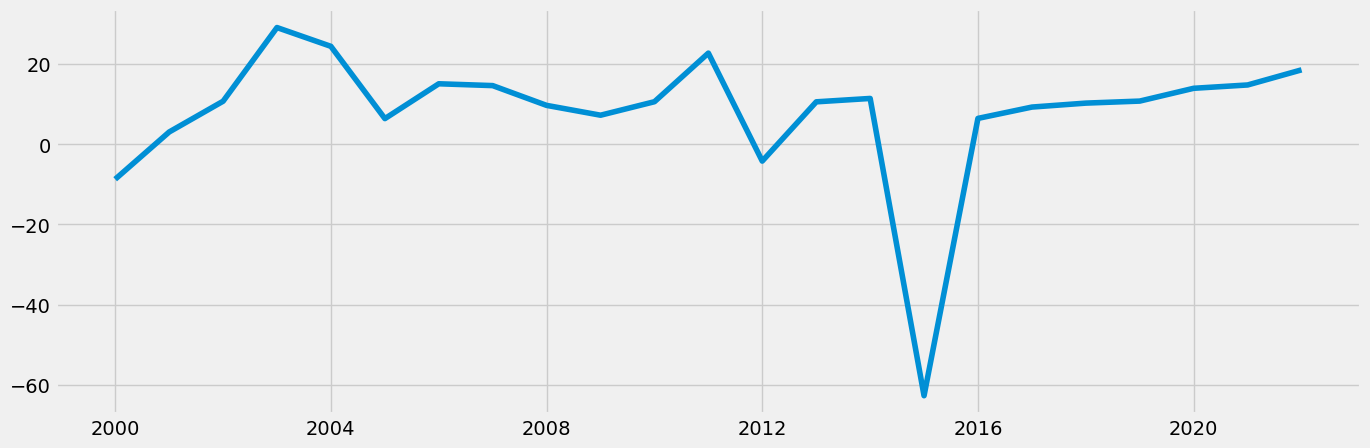

In [40]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(finland_diff)

In [41]:
dickey_fuller(finland_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.307013
p-value                         0.000432
Number of Lags Used             0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
dtype: float64
Test Statistic                 -4.307013
p-value                         0.000432
Number of Lags Used             0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
dtype: float64
Test Statistic                 -4.307013
p-value                         0.000432
Number of Lags Used             0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Observation: 

Overall, based on these results, we can conclude that there is strong evidence to reject the null hypothesis of non-stationarity. The time series data is likely stationary, as indicated by the small p-value and the test statistic exceeding the critical values. 

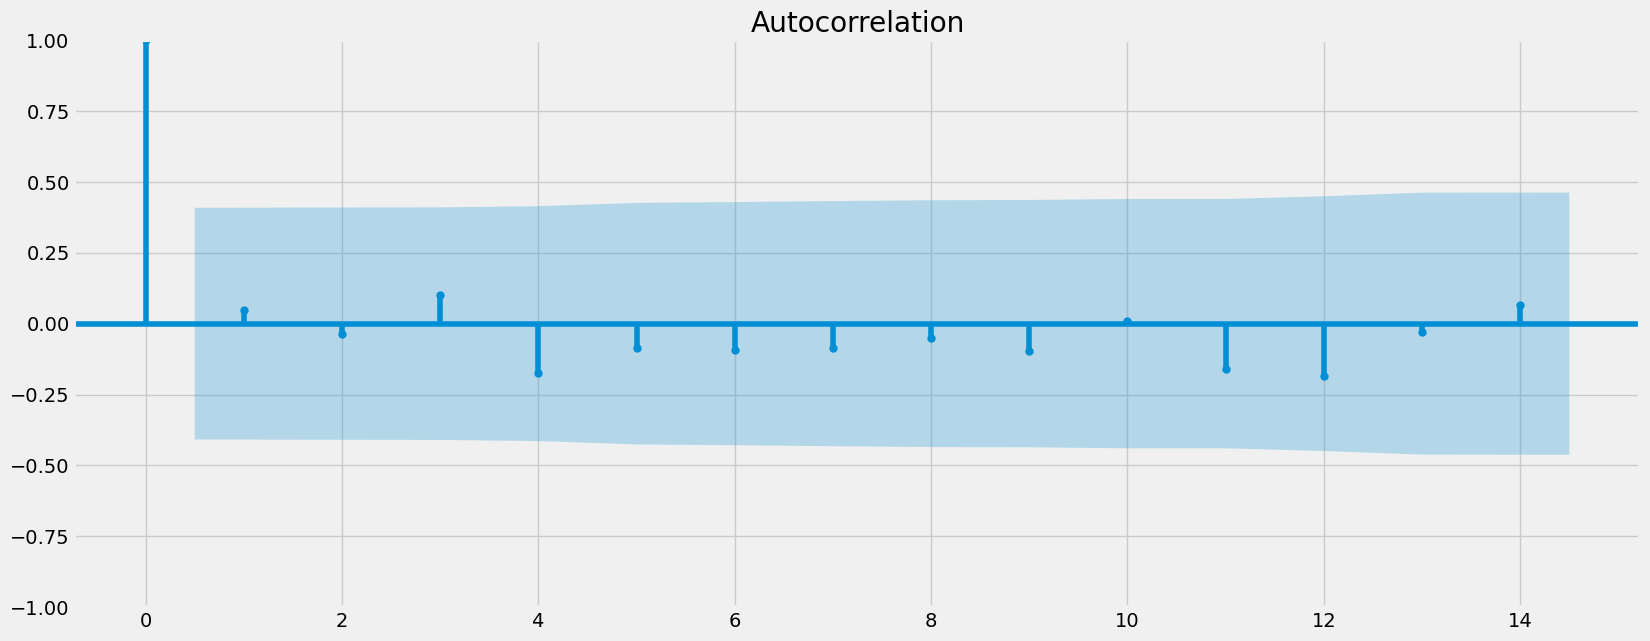

In [42]:
plot_acf(finland_diff)
plt.show()

Observation: The autocorrelation plot has improved. 